In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf



In [32]:
import os
import cv2 as cv
import numpy as np

# Define the path to the main folder
folder_path = r"C:\Users\anupa\Downloads\Plant_leave_diseases_dataset_with_augmentation"

# Define the image size
image_size = (80, 80)

# Initialize lists to store images and their labels
images = []
labels = []

# Loop through each subfolder in the main folder
for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    if os.path.isdir(subfolder_path):  # Check if it's a directory
        # Loop through each file in the subfolder
        for file_name in os.listdir(subfolder_path):
            # Check if the file is an image
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Get the full path of the image
                image_path = os.path.join(subfolder_path, file_name)
                # Read the image
                image = cv.imread(image_path)
                if image is not None:
                    # Resize the image to the desired size
                    resized_image = cv.resize(image, image_size)
                    # Append the resized image and label to their respective lists
                    images.append(resized_image)
                    labels.append(subfolder_name)  # Use the subfolder name as the label
                else:
                    print(f"Warning: Couldn't read the image {image_path}")

# Print the number of images and labels to verify
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")



Total images: 61486
Total labels: 61486


In [33]:
#NOW THE IMAGES HAVE BEEN RESIZED AND APPENDED

In [34]:
images=np.array(images)
labels=np.array(labels)

In [35]:
#Normalizing the images
images=images.astype('float32')/255

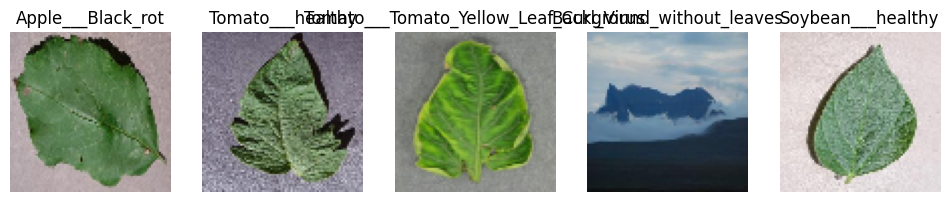

In [36]:

# Display a few sample images with labels
import matplotlib.pyplot as plt
def show_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        index = np.random.randint(len(images))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(cv.cvtColor(images[index], cv.COLOR_BGR2RGB))
        plt.title(labels[index])
        plt.axis('off')
    plt.show()

show_sample_images(images,labels)

In [37]:
# Encode labels to integers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [38]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [39]:
# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(set(labels)), activation='softmax')
])

c:\Users\anupa\anaconda3\envs\my_new_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()]
)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=9,
    batch_size=32
)


Epoch 1/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 285s 179ms/step - loss: 1.6935 - sparse_categorical_accuracy: 0.5699 - val_loss: 1.4803 - val_sparse_categorical_accuracy: 0.6698
Epoch 2/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 262s 171ms/step - loss: 0.5690 - sparse_categorical_accuracy: 0.8295 - val_loss: 1.5162 - val_sparse_categorical_accuracy: 0.6645
Epoch 3/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 248s 161ms/step - loss: 0.4019 - sparse_categorical_accuracy: 0.8769 - val_loss: 0.3570 - val_sparse_categorical_accuracy: 0.8899
Epoch 4/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 280s 182ms/step - loss: 0.2848 - sparse_categorical_accuracy: 0.9107 - val_loss: 0.3697 - val_sparse_categorical_accuracy: 0.8958
Epoch 5/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 257s 167ms/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.8291 - val_sparse_categorical_accuracy: 0.7783
Epoch 6/9
1538/1538 ━━━━━━━━━━━━━━━━━━━━ 254s 164ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9389 - val_loss: 0.8009 - val_sparse_cat

In [41]:
#Evaluate the model
val_loss,val_accuracy=model.evaluate(X_val,y_val)
print(f"Validation Loss:{val_loss}")
print(f"Validation Accuracy:{val_accuracy}")

385/385 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.2391 - sparse_categorical_accuracy: 0.9425
Validation Loss:0.2443283498287201
Validation Accuracy:0.938607931137085


In [42]:
print(history.history.keys())


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


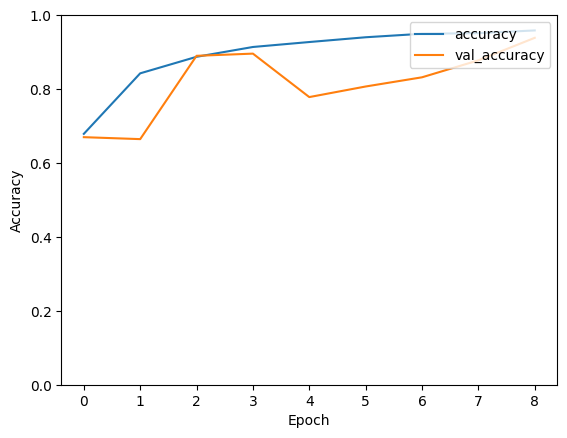

In [43]:
#Plotting training and validation accuracy values
plt.plot(history.history['sparse_categorical_accuracy'],label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.show()

In [44]:
from sklearn.metrics import classification_report
import numpy as np

# Example prediction and true labels
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Check the number of classes in your validation set
num_classes = len(np.unique(y_val))

# Generate classification report without target_names if not available
report = classification_report(y_val, y_pred_classes)
print(report)


385/385 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       208
           1       0.99      0.90      0.94       202
           2       1.00      0.76      0.86       188
           3       1.00      0.79      0.88       332
           4       0.88      0.98      0.93       218
           5       0.97      0.95      0.96       307
           6       0.70      1.00      0.82       226
           7       1.00      0.89      0.94       186
           8       0.85      0.88      0.86       192
           9       1.00      0.98      0.99       231
          10       0.92      0.85      0.88       201
          11       0.99      0.94      0.96       247
          12       0.96      0.96      0.96       242
          13       0.99      0.95      0.97       273
          14       0.98      0.95      0.96       206
          15       1.00      0.82      0.90       201
          16       0.99      0.97     

In [45]:
#Saving my model
model.save(r'C:\Users\anupa\Downloads\Plant_leave_diseases_dataset_with_augmentation\myModel1.h5')


In [57]:
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r'C:\Users\anupa\Downloads\Plant_leave_diseases_dataset_with_augmentation\myModel1.h5')

# Define the path to your dataset directory
dataset_directory = r'C:\Users\anupa\Downloads\Plant_leave_diseases_dataset_with_augmentation' 

# Extract folder names from the dataset directory
folder_names = [folder for folder in os.listdir(dataset_directory) if os.path.isdir(os.path.join(dataset_directory, folder))]
folder_names.sort()  # Optional: Sort folder names to ensure consistent order

# Initialize the camera
cap = cv.VideoCapture(0)  # 0 for default camera

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

while True:
    ret, frame = cap.read()  # Read a frame from the camera
    if not ret:
        print("Error: Failed to capture image.")
        break
    # Preprocessing the frame
    image = cv.resize(frame, (80, 80))  # Resize to 80x80 pixels
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Make predictions
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions, axis=1)
    
    # Get the folder name corresponding to the predicted class index
    predicted_folder_name = folder_names[predicted_class_index[0]]

    # Display the resulting frame with the predicted class
    label = f"Class: {predicted_folder_name}"
    cv.putText(frame, label, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)
    cv.imshow('Frame', frame)

    # Exit loop if 'q' is pressed
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
